In [3]:
density = [
    {'Country': 'China', 'Density (P/Km2)': 153 },
    {'Country': 'United States', 'Density (P/Km2)': 36 },
    {'Country': 'India', 'Density (P/Km2)': 464 },
    {'Country': 'Indonesia', 'Density (P/Km2)': 151 },
    {'Country': 'Pakistan', 'Density (P/Km2)': 287 }
]

 stats = [
    {'Country': 'China', 'Total Cases':83102,'Population':1_439_323_776},
    {'Country': 'USA', 'Total Cases':2162228,'Population': 330_917_584},
    {'Country': 'Indonesia', 'Total Cases':38277,'Population': 273_389_783},
    {'Country': 'Pakistan', 'Total Cases':139230,'Population': 220_673_722}
]

In [4]:
import pandas as pd

In [5]:
stats

[{'Country': 'China', 'Total Cases': 83102, 'Population': 1439323776},
 {'Country': 'USA', 'Total Cases': 2162228, 'Population': 330917584},
 {'Country': 'Indonesia', 'Total Cases': 38277, 'Population': 273389783},
 {'Country': 'Pakistan', 'Total Cases': 139230, 'Population': 220673722}]

In [6]:
density

[{'Country': 'China', 'Density (P/Km2)': 153},
 {'Country': 'United States', 'Density (P/Km2)': 36},
 {'Country': 'India', 'Density (P/Km2)': 464},
 {'Country': 'Indonesia', 'Density (P/Km2)': 151},
 {'Country': 'Pakistan', 'Density (P/Km2)': 287}]

In [7]:
df_density = pd.DataFrame(density)
df_stats = pd.DataFrame(stats)

In [8]:
df_density

,Country,Density (P/Km2)
0,China,153
1,United States,36
2,India,464
3,Indonesia,151
4,Pakistan,287


In [9]:
df_stats

,Country,Total Cases,Population
0,China,83102,1439323776
1,USA,2162228,330917584
2,Indonesia,38277,273389783
3,Pakistan,139230,220673722


## having a look at the columns in our two DataFrames 
### Panda by default will look for the matching onse and join on them 
### The order of columns in new DF will be as passed in , and 'Country' wont be repeated

In [10]:
df_stats.columns

Index(['Country', 'Total Cases', 'Population'], dtype='object')

In [11]:
df_density.columns

Index(['Country', 'Density (P/Km2)'], dtype='object')

In [12]:
pd_merged = pd.merge(df_stats,df_density)
pd_merged.columns


Index(['Country', 'Total Cases', 'Population', 'Density (P/Km2)'], dtype='object')

In [13]:
pd_merged

,Country,Total Cases,Population,Density (P/Km2)
0,China,83102,1439323776,153
1,Indonesia,38277,273389783,151
2,Pakistan,139230,220673722,287


## scatter plot
### each value in data set is represented by a dot

In [14]:
# a scater plot of density (P/Km2) and corressponding population 
import matplotlib.pyplot as plt 
#
from IPython.display import set_matplotlib_formats
set_matplotlib_formats ('svg')

%matplotlib inline




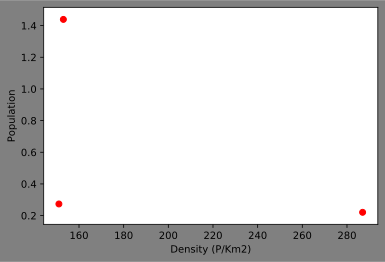

In [15]:
xvalues = pd_merged['Density (P/Km2)']
yvalues = pd_merged['Population']/ 1_000_000_000
# i am using dark mode so changing facecolor to grey 
plt.figure(facecolor='grey')
# making little dots red 
plt.scatter(xvalues,yvalues, color = 'red' )


plt.xlabel('Density (P/Km2)')
plt.ylabel('Population')

plt.show()

### dealing with missing data

In [21]:
#find all the countries in the df_density that are not in the merged DataFrame
# first we find the onse that are in and then we use TILDA
df_density [ df_density ['Country'].isin (pd_merged ['Country'])  ]

NotIn = df_density [ ~ ( df_density ['Country'].isin (pd_merged ['Country']) ) ]

In [18]:
pd_merged['Country']

0        China
1    Indonesia
2     Pakistan
Name: Country, dtype: object

In [22]:
NotIn

,Country,Density (P/Km2)
1,United States,36
2,India,464
